In [1]:
##Imports
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from mpl_toolkits.basemap import Basemap
from datetime import datetime, timedelta
import matplotlib as mpl
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth'] = 6.0

In [2]:
##GAther the data
year = '2012'
path = 'C:/Users/victo/OneDrive/Desktop/hycom2012/hycom_gomu_501_????01*.nc'

hycom_year_test = xr.open_mfdataset(path, decode_times=False)
YEAR = str(year)
i=0
b=11
date = datetime(2012,1,1)

limN, limS, limE, limW = 32, 18, -78, -100
dlat = 2
dlon = 4
 
var_name = "Surface Elevation"
punits = "centimeters"

C:\Users\victo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """
C:\Users\victo\Anaconda3\lib\site-packages\xarray\backends\api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


C:\Users\victo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


IndexError: index 9 is out of bounds for axis 0 with size 9

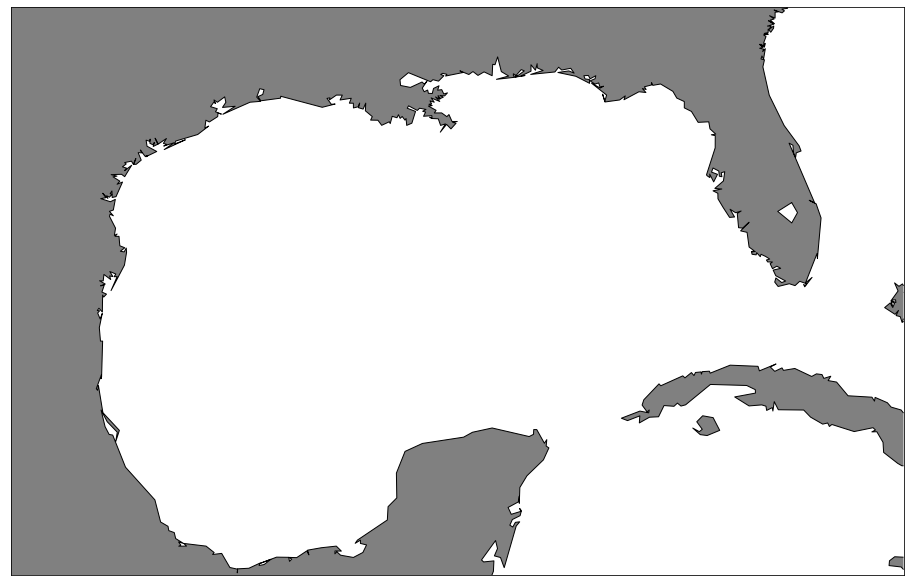

In [4]:
for time_index in range(0, hycom_year_test.time.shape[0]):
    fig = plt.figure(figsize=(16,12), facecolor = 'w')
    m = Basemap(projection='cyl', llcrnrlon=limW,urcrnrlon=limE, llcrnrlat=limS, urcrnrlat=limN, resolution='l')
    m.drawcoastlines()
    m.fillcontinents(color='grey')
    #data
    var = hycom_year_test.surf_el[i,:,:]*100
    #date = date +1 
    x, y = m(hycom_year_test.lon,hycom_year_test.lat)
    # get the correct time velocities
    U = hycom_year_test.water_u[i,0,:,:]
    V = hycom_year_test.water_v[i,0,:,:]
    #plot
    im1 = m.pcolormesh(x,y,var,zorder = 0, cmap = 'viridis', vmin=-35, vmax=50) 
    cbar = m.colorbar(im1,location='bottom',pad="5%")
    cbar.set_label(var_name + ' ('+ punits + ')')
    # plot the vectors
    
    
    
    Q = plt.quiver(x[::b], y[::b], U[::b, ::b], V[::b, ::b],linewidth=.05)#Headwidth and headlengthchange the size of the arrow head
                                                                          #Scale to make the arrows bigger of smaller, less than 1 is smaller  
    # make a key
    # Q calls the arrows, 0.1 and 0.97 are where the key is located
    qk = plt.quiverkey(Q, 0.1,0.97, 1, r'$1 \frac{m}{s}$', labelpos="W")
    #qk = plt.quiverkey(Q, 0.9,0.97, 1, r'$1 \frac{m}{s}$', labelpos="N")
    #maps
    m.drawparallels(np.arange(-90.,90.,dlat), linewidth=0.5, labels=[1,0,0,0])
    m.drawmeridians(np.arange(-180.,180.,dlon), linewidth=0.5, labels=[0,0,1,0])
   # name =  str(Date)
    plt.title('HYCOM ' + str(date.strftime("%m-%d-%Y")), y=1.08)
    plt.show()
    date = date + timedelta(days=1)
    i=i+1